In [21]:
%load_ext autotime
import os
import pandas as pd
import numpy as np

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.41 ms


In [20]:
quant = pd.read_table('~/work/BioViz-gl/data/batch3/quant-gzip.csv', index_col=0, compression='gzip').sort_index(0).sort_index(1)
print len(quant)

173259
time: 7.32 s


In [12]:
quant = pd.read_table('~/work/BioViz-gl/data/batch3/quant-gzip.csv', index_col=0, compression='gzip').sort_index(0).sort_index(1)
quant_clear = quant.loc[(quant != 0).any(axis=1)]  # delete the zero-columns/non-expressed genes
print len(quant)/1000, 'k --> ', len(quant_clear)/1000, 'k'
#quant_clear.to_csv('~/work/BioViz/data/batch3/quant-clear.csv', sep='\t')

In [15]:
quant60 = quant_clear[:5].transpose()
#print quant60
quant60.to_csv('~/raw/batch3-quant-clear5.csv')
#quant_clear.to_csv('~/work/BioViz/data/batch3/quant-cleargzip.csv', sep='\t', compression='gzip')

time: 15 ms


In [29]:
quant_clear = quant.loc[(quant >=10 ).any(axis=1)]  # delete the zero-columns/non-expressed genes
print len(quant)/1000, 'k --> ', len(quant_clear)/1000, 'k'

173 k -->  105 k
time: 1.59 s


In [33]:
#quant.to_csv('~/work/BioViz/data/batch3/quant-copy.csv', sep='\t')
#print quant_clear

time: 1.03 ms


In [36]:
quant_copy = pd.read_table('~/work/BioViz/data/batch3/quant-copy.csv', index_col=0).sort_index(0).sort_index(1)
quant_copy.to_csv('~/work/BioViz/data/batch3/quant-copy-gzip.csv', sep='\t', compression='gzip')

time: 1min 9s


In [17]:
#quant_copy_gzip = pd.read_table('~/work/BioViz/data/batch3/quant-copy-gzip.csv', index_col=0)#, compression='gzip')
#print quant_copy_gzip

time: 2.31 ms


In [ ]:
def draw_bokeh(points, meta, name, edges):
    X = points['x']
    Y = points['y']
    title = name + ' over ' + str(len(points)) + ' cells'
    colormap = { 'BE': '#ff9999', 'BL': '#ff3236', 'SE': '#ffde99', 'SL': '#ffc132' }
    #colormap = {'BE': 'pink', 'BL': 'red', 'SE': 'yellow', 'SL': 'orange'}
    colors = [colormap[x] for x in meta['sample']]
    data = dict(x=X, y=Y, text=list(meta.index), color=colors)
    source = ColumnDataSource(data=data)
    p = figure(title=title)
    if len(edges) > 0:
        x0, y0, x1, y1, recombs = zip(*edges)
        col = [ '#fc0521' if r.startswith('TRA') else '#0578fc' for r in recombs]
        p.segment(x0, y0, x1, y1, color=col, line_alpha=0.3)
    s = p.scatter(x='x', y='y', size=10, fill_alpha=0.6, color='color', source=source)
    # Labels
    #labels = LabelSet(x='x', y='y', text='text', x_offset=5, y_offset=5, source=source)
    #p.add_layout(labels)
    
    #p.add_tools(HoverTool(renderers=[s], tooltips=TIPS))
    #p.select(dict(type=HoverTool)).tooltips = {"x":"$x", "y":"$y"}
    #hover = p.select(dict(type=HoverTool))
    #hover.tooltips = OrderedDict([
    #    ("index", "$index"),
    #    ("(xx,yy)", "(@x, @y)"),
    #    ("label", "@label"),
    #])
    show(p)

In [ ]:
    #labels = ['point {0}'.format(i + 1) for i in range(len(points))]
    #tooltip = plugins.PointLabelTooltip(scatter, labels)
    #mpld3.plugins.connect(fig2, tooltip)
    #mpld3.display()
    
    # D3
    #ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)
    
    #fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]

In [19]:
print meta['samples']

NameError: name 'meta' is not defined

time: 8.92 ms


In [13]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import seaborn as sns
%matplotlib inline
sns.set()

In [17]:
#print subquant
a = [1,2,2,2,3,4,4,6,7]
#
#dendroplot(quant.as_matrix())

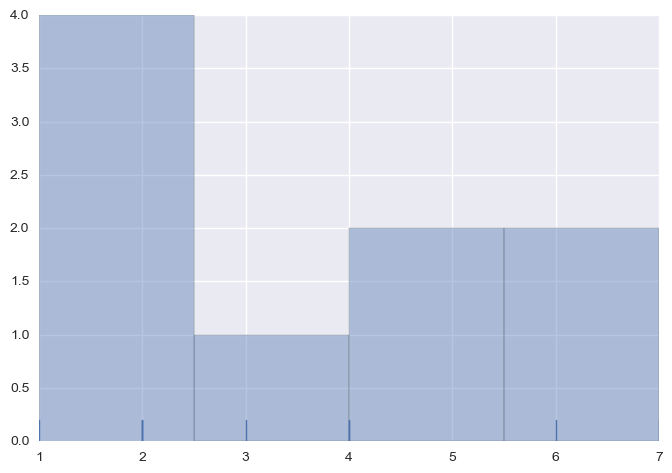

In [18]:
sns.distplot(a, kde=False, rug=True);

In [ ]:
#fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
#ax.grid(color='white', linestyle='solid')
#N = 50
#scatter = ax.scatter(np.random.normal(size=N),
#                     np.random.normal(size=N),
#                     c=np.random.random(size=N),
#                     s = 1000 * np.random.random(size=N),
#                     alpha=0.3,
#                     cmap=plt.cm.jet)
#ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)
#labels = ['point {0}'.format(i + 1) for i in range(N)]
#tooltip = plugins.PointLabelTooltip(scatter, labels)
#mpld3.plugins.connect(fig, tooltip)
#mpld3.display()

In [26]:
import rpy2
print(rpy2.__version__)

import unittest

# the verbosity level can be increased if needed
tr = unittest.TextTestRunner(verbosity = 1)
suite = rpy2.tests.suite()
tr.run(suite)

2.8.3


AttributeError: 'module' object has no attribute 'tests'

In [22]:
from rpy2 import *
#set_default_mode(NO_CONVERSION)
r.library("ALL")
r.data("ALL")
r('eset <- ALL[, ALL$mol.biol %in% c("BCR/ABL", "ALL1/AF4")]')
r.library("limma")
r('f <- factor(as.character(eset$mol.biol))')
r('design <- model.matrix(~f)')
r('fit <- eBayes(lmFit(eset,design))')
r('selected  <- p.adjust(fit$p.value[, 2]) < 0.05')
r('esetSel <- eset [selected, ]')
rpy_exprs = r('exprs(esetSel)')

def patient_colour(mol_biol) :
    if mol_biol == "ALL1/AF4" :
        return "#FF0000" # Red
    else :
        return "#0000FF" # Blue
#Get r('esetSel$mol.biol') as a python list...
set_default_mode(BASIC_CONVERSION)
patient_colours = map(patient_colour, r('esetSel$mol.biol'))

r.heatmap(rpy_exprs,
          cexRow=0.5,
          ColSideColors = patient_colours,
          col = r.topo_colors(50))

NameError: name 'r' is not defined